In [1]:
def return_parameters(parameters_file : str):
    with open(parameters_file, 'r') as f:
        TIME_dt_DTS = f.readline().split(' ')
        TIME = (int)(TIME_dt_DTS[0])
        dt = (float)(TIME_dt_DTS[1])
        DTS = (int)(TIME_dt_DTS[2])
        SIZE = (int)(f.readline())
        return TIME, dt, DTS, SIZE

In [2]:
def set_field_frame(t : int, field : list, field_to_read : str):
    field.clear()
    with open(field_to_read, 'r') as f:
        next(f)
        next(f)
        for n in range(t):
            next(f) 
            continue
        
        temp = f.readline()
        temp = temp.split(' ')[:-1]
        field.append(list(map(float, temp)))

In [6]:
import matplotlib.pyplot as plt

def set_whole_ax(axes, ddata_name : list, ddata_enum : dict, SIZE):
    ax = axes[ ddata_name[ddata_enum['axes_position']] ]
    ax.set_title ( ddata_name[ ddata_enum[ 'title' ] ], fontsize=12 )
    ax.set_xlabel( ddata_name[ ddata_enum['x_label'] ], fontsize=12 )
    ax.set_xlim  ( (0,SIZE) )
    ax.set_ylim  ( ddata_name[ ddata_enum['vmin_vmax'] ] )
    pl_ = ax.plot( range(SIZE)[:200], (ddata_name[ ddata_enum['frame_data'] ])[0][:200] )
    

In [4]:
def clear_whole_figure(axes, nrows, ncols):
    for i in range(nrows):
        for j in range(ncols):
            axes[i,j].cla()

1

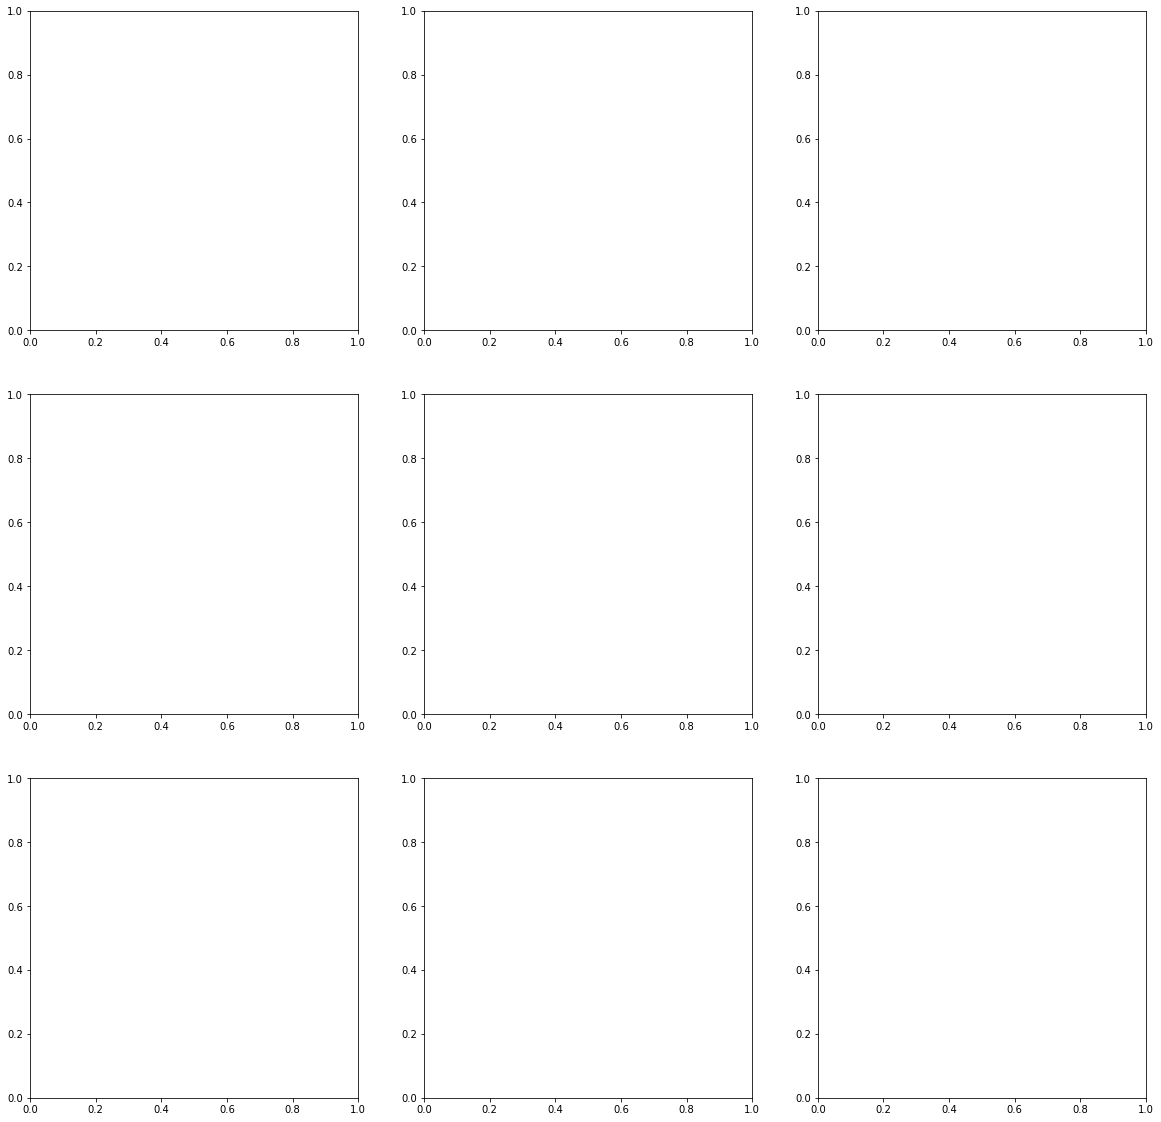

In [7]:
parameters_file = "jx.txt"
TIME, dt, DTS, SIZE = return_parameters(parameters_file)

ddata = {
    
    #'name': ["file.txt", [frame_data], (axes_position), "title", (vmin, vmax)]
    'jx': [ "jx.txt", [], (0,0), "$j_x$", "$(\ \hatx/h,\ \haty/h\ =\ Ny/2\ )$", (-7e-3, 7e-3) ],
    'jy': [ "jy.txt", [], (0,1), "$j_y$", "$(\ \hatx/h,\ \haty/h\ =\ Ny/2\ )$", (-7e-3, 7e-3) ],
    'jz': [ "jz.txt", [], (0,2), "$j_z$", "$(\ \hatx/h,\ \haty/h\ =\ Ny/2\ )$", (-7e-1, 7e-1) ],
    'Ex': [ "Ex.txt", [], (1,0), "$E_x$", "$(\ \hatx/h,\ \haty/h\ =\ Ny/2\ )$", (-7e-3, 7e-3) ],
    'Ey': [ "Ey.txt", [], (1,1), "$E_y$", "$(\ \hatx/h,\ \haty/h\ =\ Ny/2\ )$", (-7e-3, 7e-3) ],
    'Ez': [ "Ez.txt", [], (1,2), "$E_z$", "$(\ \hatx/h,\ \haty/h\ =\ Ny/2\ )$", (-7e-3, 7e-3) ],
    'Bx': [ "Bx.txt", [], (2,0), "$B_x$", "$(\ \hatx/h,\ \haty/h\ =\ Ny/2\ )$", (-7e-2, 7e-2) ],
    'By': [ "By.txt", [], (2,1), "$B_y$", "$(\ \hatx/h,\ \haty/h\ =\ Ny/2\ )$", (-7e-4, 7e-4) ],
    'Bz': [ "Bz.txt", [], (2,2), "$B_z$", "$(\ \hatx/h,\ \haty/h\ =\ Ny/2\ )$", (-7e-4, 7e-4) ],
    
}

ddata_enum = {
    
    'file_to_read':     0,
    'frame_data':       1,
    'axes_position':    2,
    'title':            3,
    'x_label':          4,
    'vmin_vmax':        5,
    
}

nrows = 3
ncols = 3


fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,20))


for t in range(0, int(TIME/DTS), 1):
    
    for name in ddata.keys():
        if (name[:3] != 'off'):
            set_field_frame(t, ddata[name][ddata_enum['frame_data']],
                               ddata[name][ddata_enum['file_to_read']] )

            set_whole_ax(axes, ddata[name], ddata_enum, SIZE)
            
        else:
            axes[ ddata[name][ddata_enum['axes_position']] ].axis("off")
        
    axes[0,1].text(0.4, 1.1, "$\hatt\ =\ %.2f\ $" %(DTS*t*dt), transform=axes[0,1].transAxes, fontsize=13)

    name = str(t).zfill(len(str(int(TIME/DTS)-1)))
    fig.savefig("./animation/" + name  + ".png")
    
    clear_whole_figure(axes, nrows, ncols) 

import os

os.system("cd ./animation/ && (ffmpeg -f image2 -i %03d.png -r 15 ../../fields_along_Y.mp4)")